# Test notebook for some standard environments.


This notebook contains demonstrations of 

(2011 Nguyen)

* 4x4 Maze

(2012 Daswani)

* Deterministic TMaze

* Stochastic TMaze

* Tiger

In [36]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from env.environments import Grid4x4
from agents.agent import RandomAgent
from agents.sarsa import Sarsa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


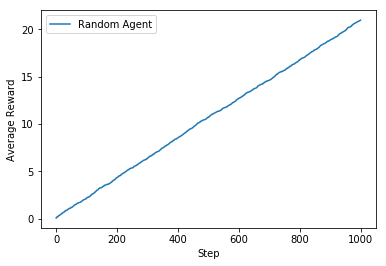

In [38]:
def show_moves(agent, env):
    """ Shows some examples moves between agent and enviroment. """
    
    print("Playing game with agent {} in environment {}".format(agent, env)) 
    obs, reward = env.reset(), 0    
    for i in range(10):
        action = agent.act(obs,reward)
        print("Saw observation {} with reward {} and played action {}".format(obs, reward, action))
        obs, reward, done, info = env.step(action)
        env.render()
        if done:
            break        
            
def evaluate_agent(agent, env, max_steps = 1000):
    """ Evaluates the agents performance on the environment. """
        
    obs, reward = env.reset(), 0    
    total_reward = 0
    reward_history = []
    
    for i in range(max_steps):
        action = agent.act(obs,reward)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        reward_history.append(total_reward)
        if done:
            break 
        
    return reward_history
        
def plot_reward_history(agent, env):
    
    steps = 1000
    trials = 100
    
    total_reward = np.zeros(steps)

    for i in range(trials):
        total_reward += np.array(np.array(evaluate_agent(agent, env, steps))) / trials

    plt.plot(range(steps), total_reward, label=agent)        
    plt.xlabel("Step")
    plt.ylabel("Average Reward")    
    plt.legend()
    plt.show()

env = Grid4x4()
agent = RandomAgent(env.action_space)
plot_reward_history(agent,env)